<a href="https://colab.research.google.com/github/carlosmanm/Data_Science/blob/main/Python_Fundamentals/Independent_Projects/Stock_Analysis/Forecasting_BitcoinPrice_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forecasting Bitcoin Price

In [ ]:
# Description: this program uses an artificial recurrent neural network called Long Short Term Memory (LSTM) to predict the closing stock price of the bitcoin (BTC-USD) using the past 3 years stock price

In [ ]:
# pip install yfinance

## Installing the libraries

In [ ]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yfin

In [ ]:
import math
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

## Load the data

In [ ]:
yfin.pdr_override()

In [ ]:
df = pdr.get_data_yahoo("BTC-USD", start="2019-01-01", end="2022-01-15")

[*********************100%***********************]  1 of 1 completed


In [ ]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

## Working with the data

In [ ]:
# Get the number of rows and columns in the dataset
df.shape

(1111, 6)

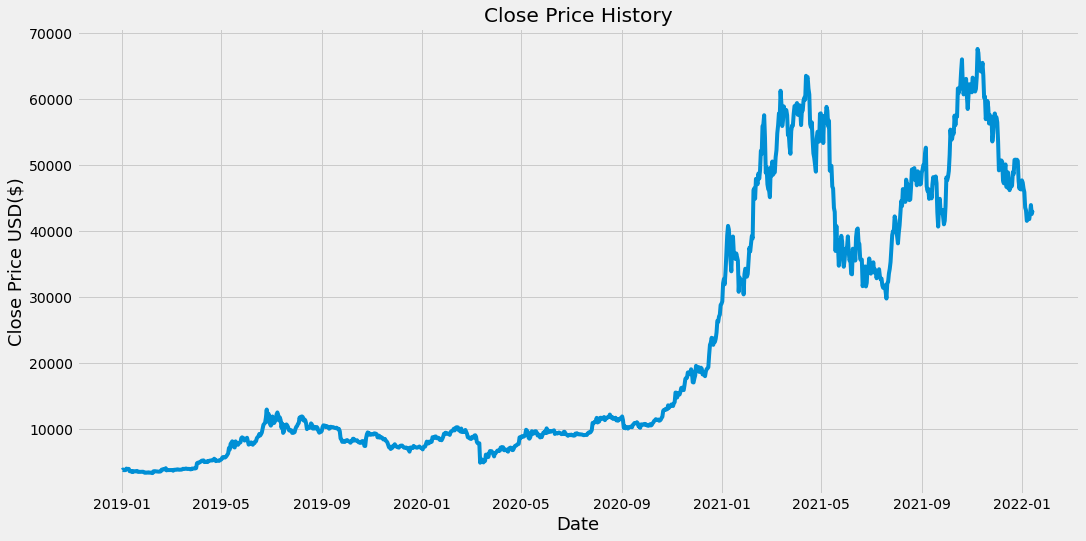

In [ ]:
# Visualize the closing price history

plt.figure(figsize = (16, 8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.show()

In [ ]:
# Create a new df with only the close column

data = df.filter(['Close'])

# Convert the df to a numpy array

dataset = data.values

# Get the number of rows to train the model on

training_data_len = math.ceil(len(dataset) * .8)

training_data_len



889

In [ ]:
# Scale the data: advantage to apply preprocessing to input before it is presented to a neural network. It's a good practice.

scaler = MinMaxScaler(feature_range=(0,1))

scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00692016],
       [0.00847686],
       [0.00681452],
       ...,
       [0.61077939],
       [0.61869819],
       [0.61990908]])

In [ ]:
# Create the training dataset.

# Create the scaled training data set

train_data = scaled_data[0:training_data_len, :]

# Split the data into x_train and y_train data sets

x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i, 0])
  if i <=61:
    print(x_train)
    print(y_train)
    print()

# y contains the 61 value that we want our model to predict and the X underscore train dataset contains the past 60 values

[array([0.00692016, 0.00847686, 0.00681452, 0.00714142, 0.00694626,
       0.01055304, 0.00975226, 0.00983952, 0.00990885, 0.00435506,
       0.00448661, 0.00408041, 0.00239189, 0.00477783, 0.00360313,
       0.00398232, 0.00434944, 0.00402647, 0.00512872, 0.00314088,
       0.00275157, 0.00319641, 0.00289324, 0.00313857, 0.00312143,
       0.00316343, 0.0028752 , 0.00110615, 0.0007581 , 0.00135131,
       0.00090889, 0.0013788 , 0.00189487, 0.00100583, 0.0009301 ,
       0.00104236, 0.00022279, 0.        , 0.0041658 , 0.00423474,
       0.0045306 , 0.00387984, 0.00395929, 0.00362488, 0.00338816,
       0.0034494 , 0.0035893 , 0.00427576, 0.00804525, 0.00853429,
       0.00935599, 0.00864375, 0.00944491, 0.01157996, 0.00640444,
       0.00753069, 0.00708906, 0.00703747, 0.00709572, 0.0071705 ])]
[0.007245792644913686]

[array([0.00692016, 0.00847686, 0.00681452, 0.00714142, 0.00694626,
       0.01055304, 0.00975226, 0.00983952, 0.00990885, 0.00435506,
       0.00448661, 0.00408041, 0.0

In [ ]:
# the last 2 values are that I just predicted

# Convert the x_train and y_train to numpy arrays

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(829, 60)

In [ ]:
# Reshape the data, cause the lsdm network expects the imput to be 3-dimensional in the form of samples, number of time steps and number of features and right now is 2-dimensional.

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) # x_train.shape[0] is rows, and x_train.shape[1] is columns

x_train.shape

(829, 60, 1)

In [ ]:
# Build the LSTM model

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))

# Add a few more layers: Building our model architecture

model.add(Dense(25))

model.add(Dense(1))


In [ ]:
# Compile the model

model.compile(optimizer='adam', loss='mean_squared_error')



In [ ]:
# Train the model

model.fit(x_train, y_train, batch_size=1, epochs=1) # epoch is the number of iterations when an entire dataset is passed forward and backward through a neural network

829/829 [==============================] - 26s 28ms/step - loss: 0.0028


In [ ]:
# Creating the testing dataset
# Lest create a new array containing scaled values from index 829 to 1111

test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test

x_test = []
y_test = dataset[training_data_len:,:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [ ]:
# Convert the data to a numpy array

x_test = np.array(x_test)

In [ ]:
# Reshape the data

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
# Get the models predicted price values

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
# Get the root mean squared error (RMSE)

rmse = np.sqrt(np.mean(predictions - y_test) ** 2)
rmse

2764.2968925957207

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


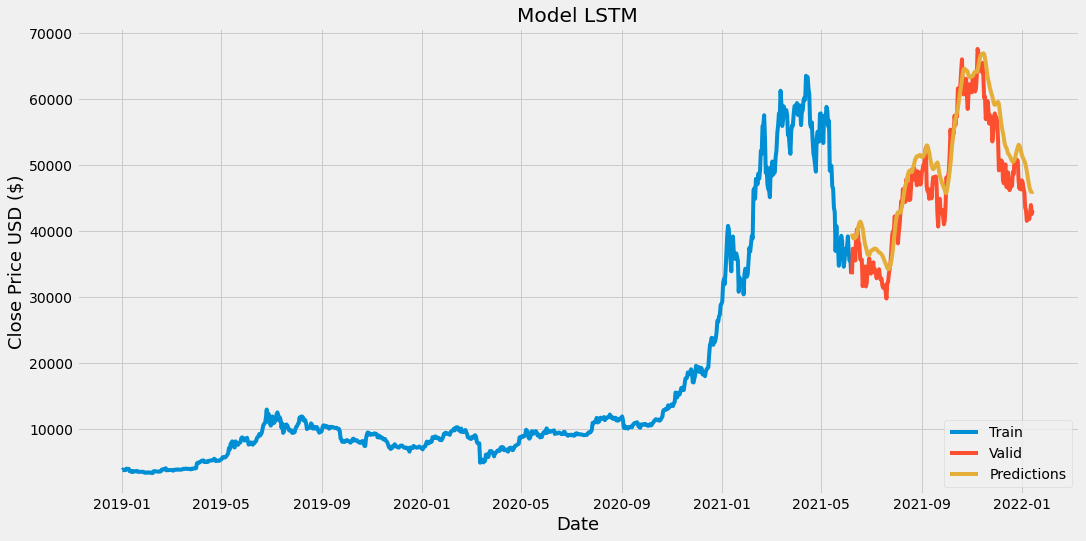

In [ ]:
# Plot the data

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data

plt.figure(figsize=(16, 8))
plt.title('Model LSTM')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Valid', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# Show the valid and predicted prices

valid

,Close,Predictions
Date,,
2021-06-08,33472.632812,39630.667969
2021-06-09,37345.121094,39038.835938
2021-06-10,36702.597656,38884.917969
2021-06-11,37334.398438,38895.929688
2021-06-12,35552.515625,39070.601562
...,...,...
2022-01-11,42735.855469,46263.746094
2022-01-12,43949.101562,45959.460938
2022-01-13,42591.570312,45945.101562


In [ ]:
# Get the quoate

btc_quote = pdr.get_data_yahoo("BTC-USD", start="2019-01-01", end="2022-01-15")

# Create a new dataframe

new_df = btc_quote.filter(['Close'])

# Get the last 60 day closing price value and convert the df to an array

last_60_days = new_df[-60:].values

# Scaled the data to be the values between 0 and 1

last_60_days_scaled = scaler.transform(last_60_days)

# Create an empty list

X_test = []

# Append the past 60 days

X_test.append(last_60_days_scaled)

# Convert the x_test data set to an array 

X_test = np.array(X_test)

# reshape the data 

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

pred_price = model.predict(X_test)

# Undo the scaling

pred_price = scaler.inverse_transform(pred_price)

print(pred_price)

[*********************100%***********************]  1 of 1 completed
[[46052.945]]


In [ ]:
# Get the quote

btc_quote2 = pdr.get_data_yahoo("BTC-USD", start="2019-01-01", end="2022-01-16")
print(btc_quote2['Close'])


[*********************100%***********************]  1 of 1 completed
Date
2019-01-01     3843.520020
2019-01-02     3943.409424
2019-01-03     3836.741211
2019-01-04     3857.717529
2019-01-05     3845.194580
                  ...     
2022-01-11    42735.855469
2022-01-12    43949.101562
2022-01-13    42591.570312
2022-01-14    43099.699219
2022-01-15    43177.398438
Name: Close, Length: 1111, dtype: float64
